# HW4 - Analyzing Bias in Networks - DSCI 531 - Spring 2023|

### Please complete the code or analysis under “TODO”. 70pts in total. You should run every cell and keep all the outputs before submitting. Failing to include your outputs will result in zero points.

### Please keep in mind the academic integrity. Plagiarism will be taken seriously.

## Reading Data

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import loadmat
from collections import Counter


chicago_mat = loadmat('Data/UChicago.mat')
chicago_adj = chicago_mat['A']
chicago_info = chicago_mat['local_info']


caltech_mat = loadmat('Data/Caltech.mat')
caltech_adj = caltech_mat['A']
caltech_info = caltech_mat['local_info']

print("Chicago graph")
print(f"number of nodes={chicago_adj.shape[0]}")
print(f"number of edges={int(np.sum(chicago_adj)//2)}")
print()

chicago_gender = np.zeros(chicago_adj.shape[0], dtype=int)
chicago_gender[chicago_info[:, 1] == 1] = 1
chicago_gender[chicago_info[:, 1] == 2] = 2
print(f"Genders: \n\t#0 = {len(chicago_gender[chicago_gender == 0])} \n\t#1 = {len(chicago_gender[chicago_gender == 1])} \n\t#2 = {len(chicago_gender[chicago_gender == 2])}")
print()


print("Caltech graph: ")
print(f"number of nodes={caltech_adj.shape[0]}")
print(f"number of edges={int(np.sum(caltech_adj)//2)}")
print()


caltech_gender = np.zeros(caltech_adj.shape[0], dtype=int)
caltech_gender[caltech_info[:, 1] == 1] = 1
caltech_gender[caltech_info[:, 1] == 2] = 2

print("")
print("caltech genders: \n\t#0 = {} \n\t#1 = {} \n\t#2 = {}".format(len(caltech_gender[caltech_gender == 0]), len(caltech_gender[caltech_gender == 1]), len(caltech_gender[caltech_gender == 2])))

Chicago graph
number of nodes=6591
number of edges=208103

Genders: 
	#0 = 673 
	#1 = 2875 
	#2 = 3043

Caltech graph: 
number of nodes=769
number of edges=16656


caltech genders: 
	#0 = 66 
	#1 = 228 
	#2 = 475


## Analysis of Centrality
### Compute Centrality Scores for Caltech and Chicago, and compare them.

<Figure size 640x480 with 0 Axes>

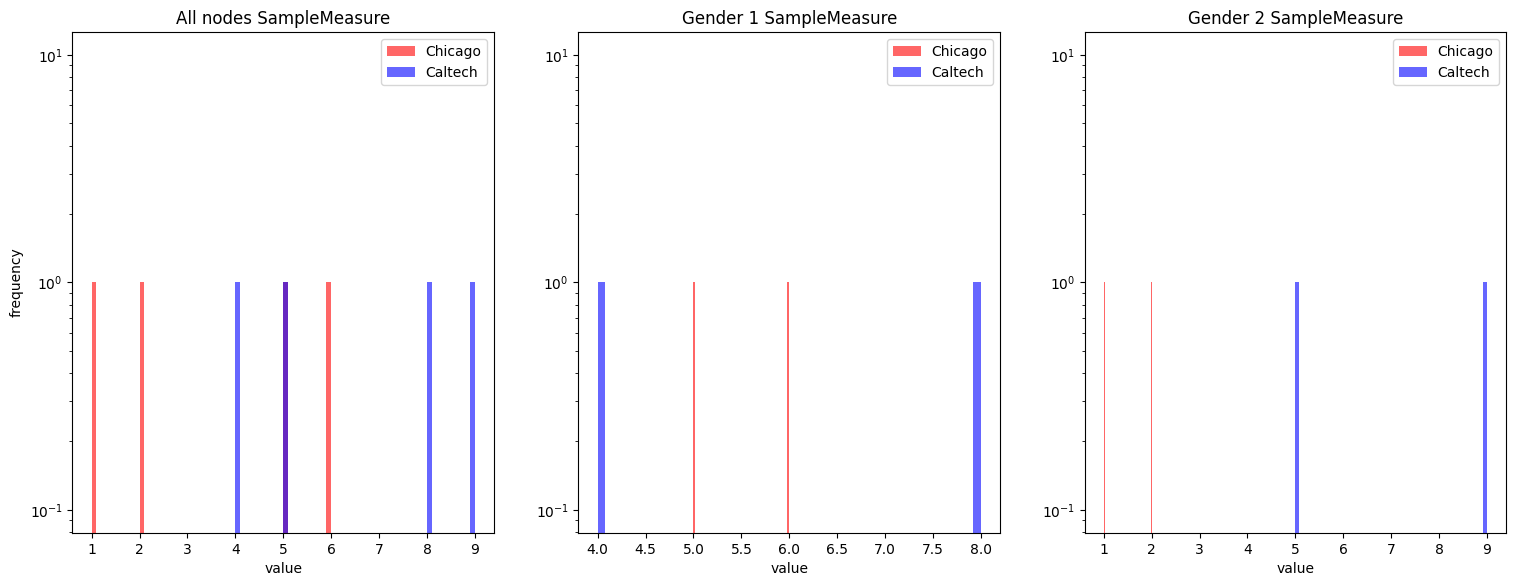

SampleMeasure mean and std:
	Chicago:
		All = 3.500 (+- 2.0616)
		Gender 1 = 5.500 (+- 0.5000)
		Gender 2 = 1.500 (+- 0.5000)
	Caltech:
		All = 6.500 (+- 2.0616)
		Gender 1 = 6.000 (+- 2.0000)
		Gender 2 = 7.000 (+- 2.0000)



In [2]:
def compare_nodes_centrality(centrality_name, chi_measure, chi_gender, cal_measure, cal_gender):
    """
    Show information about centrality measure
    :centrality_name (string): the title of the plot i.e.: PageRank, Degree Centrality, ...
    :chi_measure (dict): Chicago nodes centrality measures. keys are nodes, values are centrality measure
    :chi_gender (list): Gender of Chicago nodes -- chicago_gender array
    :cal_measure (dict): Caltech nodes centrality measures. keys are nodes, values are centrality measure
    :cal_gender (list): Gender of Caltech nodes -- caltech_gender array
    """
    
    
    plt.clf()
    fig, axs = plt.subplots(1, 3)
    
    chi_all = list(chi_measure.values())
    cal_all = list(cal_measure.values())
    axs[0].hist(chi_all, bins=50, color='red', alpha=0.6, label='Chicago', density=False)
    axs[0].hist(cal_all, bins=50, color='blue', alpha=0.6, label='Caltech', density=False)
    axs[0].set_yscale('log')
    axs[0].set_xlabel('value')
    axs[0].set_ylabel('frequency')
    axs[0].legend(loc='upper right')
    axs[0].set_title("All nodes " + centrality_name)
    
    chi_gen_1 = [val for key, val in chi_measure.items() if key in np.where(chi_gender == 1)[0]]
    cal_gen_1 = [val for key, val in cal_measure.items() if key in np.where(cal_gender == 1)[0]]
    axs[1].hist(chi_gen_1, bins=50, color='red', alpha=0.6, label='Chicago', density=False)
    axs[1].hist(cal_gen_1, bins=50, color='blue', alpha=0.6, label='Caltech', density=False)
    axs[1].set_yscale('log')
    axs[1].set_xlabel('value')
    axs[1].legend(loc='upper right')
    axs[1].set_title("Gender 1 " + centrality_name)
    
    chi_gen_2 = [val for key, val in chi_measure.items() if key in np.where(chi_gender == 2)[0]]
    cal_gen_2 = [val for key, val in cal_measure.items() if key in np.where(cal_gender == 2)[0]]
    axs[2].hist(chi_gen_2, bins=50, color='red', alpha=0.6, label='Chicago', density=False)
    axs[2].hist(cal_gen_2, bins=50, color='blue', alpha=0.6, label='Caltech', density=False)
    axs[2].set_yscale('log')
    axs[2].set_xlabel('value')
    axs[2].legend(loc='upper right')
    axs[2].set_title("Gender 2 " + centrality_name)
    
    fig.set_size_inches(18.5, 6.5)
    plt.show()
    
    print("{} mean and std:".format(centrality_name))
    
    print("\tChicago:")
    print("\t\tAll = {0:.3f} (+- {1:.4f})".format(np.mean(chi_all), np.std(chi_all)))
    print("\t\tGender 1 = {0:.3f} (+- {1:.4f})".format(np.mean(chi_gen_1), np.std(chi_gen_1)))
    print("\t\tGender 2 = {0:.3f} (+- {1:.4f})".format(np.mean(chi_gen_2), np.std(chi_gen_2)))
    
    print("\tCaltech:")
    print("\t\tAll = {0:.3f} (+- {1:.4f})".format(np.mean(cal_all), np.std(cal_all)))
    print("\t\tGender 1 = {0:.3f} (+- {1:.4f})".format(np.mean(cal_gen_1), np.std(cal_gen_1)))
    print("\t\tGender 2 = {0:.3f} (+- {1:.4f})".format(np.mean(cal_gen_2), np.std(cal_gen_2)))
    
    print ("")


    
# This is a toy test to help you better understand what this function does.
chi_measure = {
    0: 5,
    1: 6,
    2: 1,
    3: 2
}
chi_gender = np.array([1, 1, 2, 2])

cal_measure = {
    0: 8,
    1: 4,
    2: 9,
    3: 5
}
cal_gender = np.array([1, 1, 2, 2])
compare_nodes_centrality('SampleMeasure', chi_measure, chi_gender, cal_measure, cal_gender)

In [3]:
import networkx as nx

# create the networkx objects for the two graphs
G_chicago = nx.from_scipy_sparse_array(chicago_adj)
G_caltech = nx.from_scipy_sparse_array(caltech_adj)

In [4]:
# compute the betweenness centrality scores (dict, keys are nodes, values are centrality measure) for Chicago and Caltech
# TODO. 4pts
chi_betweenness = nx.betweenness_centrality(G_chicago)
cal_betweenesss = nx.betweenness_centrality(G_caltech)

compare_nodes_centrality('Betweenness', chi_betweenness, chicago_gender, cal_betweenesss, caltech_gender)

In [ ]:
# compute the degreee centrality scores (dict, keys are nodes, values are centrality measure) for Chicago and Caltech
# TODO. 4pts
chi_degree = nx.degree_centrality(G_chicago)
cal_degree = nx.degree_centrality(G_caltech)

compare_nodes_centrality('degree', chi_degree, chicago_gender, cal_degree, caltech_gender)

In [ ]:
# compute the eigenvector centrality scores (dict, keys are nodes, values are centrality measure) for Chicago and Caltech
# TODO. 4pts
chi_eigen = nx.eigenvector_centrality(G_chicago, max_iter=1000)
cal_eigen = nx.eigenvector_centrality(G_caltech, max_iter=1000)

compare_nodes_centrality('eigen', chi_eigen, chicago_gender, cal_eigen, caltech_gender)

### Which university has more gender gap in terms of centrality? Which centrality score(s) show(s) such gender gap?  Give your insights on why this university has higher gender gap on the centrality score(s). 4pts

#### <font color="red">Please type your response here.</font>
#### ***************

### Analyze the correlation between different centrality scores

In [ ]:
# find the Spearman's rank correlation among the four centrality scores on Chicago
# TODO. 3pts
corr_pagerank_betweeness_chi = 
corr_pagerank_degree_chi = 
corr_pagerank_eigen_chi =
corr_betweenness_degree_chi = 
corr_betweeness_eigen_chi = 
corr_degree_eigen_chi = 

print(f'pagerank and betweeness: {corr_pagerank_betweeness_chi:3f}')
print(f'pagerank and degree: {corr_pagerank_degree_chi:3f}')
print(f'pagerank and eigen: {corr_pagerank_eigen_chi:3f}')
print(f'betweeness and degree: {corr_betweenness_degree_chi:3f}')
print(f'betweeness and eigen: {corr_betweeness_eigen_chi:3f}')
print(f'degree and eigen: {corr_degree_eigen_chi:3f}')

In [ ]:
# find the Spearman's rank correlation among the four centrality scores on Caltech
# TODO. 3pts
corr_pagerank_betweeness_cal = 
corr_pagerank_degree_cal = 
corr_pagerank_eigen_cal =
corr_betweenness_degree_cal = 
corr_betweeness_eigen_cal = 
corr_degree_eigen_cal = 


print(f'pagerank and betweeness: {corr_pagerank_betweeness_cal:3f}')
print(f'pagerank and degree: {corr_pagerank_degree_cal:3f}')
print(f'pagerank and eigen: {corr_pagerank_eigen_cal:3f}')
print(f'betweeness and degree: {corr_betweenness_degree_cal:3f}')
print(f'betweeness and eigen: {corr_betweeness_eigen_cal:3f}')
print(f'degree and eigen: {corr_degree_eigen_cal:3f}')

### For Chicago and Caltech respecitively, which centrality score pair has the most correlation? Give your insights on why the two scores in this pair have the most correlation. 4pts.

#### <font color="red">Please type your response here.</font>
#### ***************

### Compare the four centrality score measures to Clustering Coefficient

In [ ]:
# compute the correlation between each centrality score and clustering coefficient on Chicago
# TODO. 3pts
clustering_coeff_chi = 
corr_pagerank_cluster_chi = 
corr_betweeness_cluster_chi = 
corr_degree_cluster_chi = 
corr_eigen_cluster_chi = 

print(f'pagerank and clustering: {corr_pagerank_cluster_chi:.3f}')
print(f'betweeness and clustering: {corr_betweeness_cluster_chi:.3f}')
print(f'degree and clustering: {corr_degree_cluster_chi:.3f}')
print(f'eigen and clustering: {corr_eigen_cluster_chi:.3f}')

In [ ]:
# compute the correlation between each centrality score and clustering coefficient on Caltech
# TODO. 3pts
clustering_coeff_cal = 
corr_pagerank_cluster_cal = 
corr_betweeness_cluster_cal = 
corr_degree_cluster_cal = 
corr_eigen_cluster_cal = 

print(f'pagerank and clustering: {corr_pagerank_cluster_cal:.3f}')
print(f'betweeness and clustering: {corr_betweeness_cluster_cal:.3f}')
print(f'degree and clustering: {corr_degree_cluster_cal:.3f}')
print(f'eigen and clustering: {corr_eigen_cluster_cal:.3f}')

### For Chicago and Caltech respecitively, among the four centrality scores, which one has the least correlation with the clustering coefficient? Please give your insights. 4pts

#### <font color="red">Please type your response here.</font>
#### ***************

## Analysis of Link Prediction
### Conduct link prediction on Caltech

In [ ]:
edges = list(G_caltech.edges)

# note that G_caltech is an undirected graph
# if there is an edge between node a and b, 
# the edge list will only contain (a, b) or (b, a) to save space, where a<=b or b<=a respectively
edges[:10]

In [ ]:
# from edges, sample 75% training edges and 25% test edges
# both edges_train and edges_test should be a list of edges
# TODO. 2pts.
edges_train = 
edges_test = 


print(len(edges_train))
print(len(edges_test))

# construct a training Graph based on training edges
G_train = nx.from_edgelist(edges_train)
G_train.add_nodes_from(G_caltech.nodes)
print(G_train)

In [ ]:
# we want the algorithm to score all the possible edges except those in the training set
G_complete = nx.complete_graph(G_caltech.number_of_nodes())
edges_complete = list(G_complete.edges)
edges_to_score = list(set(edges_complete) - set(edges_train))
print(len(edges_to_score))

In [ ]:
# link prediction using Adamic-Adar index
# you need to score every edge in edges_to_score
# edge_score_ada should be a dictionary {(u, v): score}
# TODO. 3pts
edge_score_ada = 

print(len(edge_score_ada))


# plot a histogram of all the scores in edge_score_ada
# TODO. 2pts


In [ ]:
# link prediction using Jaccard Coefficient
# you need to score every edge in edges_to_score
# edge_score_jac should be a dictionary {(u, v): score}
# TODO. 3pts.
edge_score_jac = 


print(len(edge_score_jac))

# plot a histogram of all the scores in edge_score_jac
# TODO. 2pts


In [ ]:
# the link prediction evaluation of the entire graph is based on that of each node
# we only evaluate nodes that have a degree >= 20 and have gender label 1 or 2
from collections import Counter
deg = Counter(list(sum(edges_to_score, ())))
nodes_to_eval = [k for k, v in deg.items() if v >= 20]
nodes_to_eval = [node for node in nodes_to_eval if caltech_gender[node] != 0]

from collections import Counter
print(f'Gender count in nodes_to_eval: {Counter(caltech_gender[nodes_to_eval])}')

In [ ]:
def eval_link_prediction(nodes_to_eval, edge_score, gender, edges_test, k):
    """
    :nodes_to_eval (list): a list of nodes to evaluate
    :edge_score (dict): the predicted scores for edges in edges_to_score
    :gender (list): the gender list for all nodes in the graph
    :edges_test (list): the edge list of the test edges
    :k (int): the k in precision@k
    Return the average precision on nodes, the average precision for gender1 nodes, 
    and the average precision for gender2 nodes.
    
    Hint:
    For each node in nodes_to_eval, 
    retrieve the top-k incident edges on this node ranked by the predicted scores given in edge_score.
    Count how many retrieved edges are actually in edges_test.
    In this way, we can obtain the precision of predicted links for this node.
    Compute the precisions for all nodes in nodes_to_eval, return the avearge precision.
    Similarly, compute the average precision for only nodes with gender1/gender2 in nodes_to_eval.

    """
    #TODO. 10pts.
    
    
    return precision, precision_gender1, precision_gender2


# a test case
# this test graph has six nodes [0, 1, 2, 3, 4, 5]
nodes_to_eval_example = [0,1,2,4]
edge_score_example = {(0, 1): 0.27, (0, 2): 0.39, (0, 3): 0.32, 
                      (1, 2): 0.3, (1, 4): 0.7,  (1, 5): 0.67, 
                      (2, 4): 0.45, (2, 5): 0.58, (4, 5): 0.9}
gender_example = [2,1,1,2,2,1]
edges_test_example = [(0, 3), (1,4), (1, 5), (2, 3), (2, 5), (3, 4)]
print(eval_link_prediction(nodes_to_eval_example, edge_score_example, gender_example, edges_test_example, 1))
print(eval_link_prediction(nodes_to_eval_example, edge_score_example, gender_example, edges_test_example, 2))

In [ ]:
for algo in ['adamic-adar', 'jaccard']:
    print(f'Evaluating link prediction on {algo}')
    for k in [5, 10, 20]:
        edge_score = edge_score_ada if algo == 'adamic-adar' else edge_score_jaccard
        precision, precision_gender1, precision_gender2 = eval_link_prediction(nodes_to_eval, 
                                                                              edge_score,
                                                                              caltech_gender,
                                                                              edges_test,
                                                                              k)
        print(f'precision@{k}: {precision:.3f}, precision@{k} for gender1: {precision_gender1: .3f}, precision@{k} for gender2: {precision_gender2:.3f}, precision@{k} diff: {precision_gender1-precision_gender2: .3f}')
    print()

### 1) On which gender the algorithms give better precision?  Give your insights on that. 3pts.
### 2 Which algorithm is more fair (lower precision gap)? Please give your insights on that. (Hint: Understand how the two algorithms work, and refer to the calculated centrality scores on Caltech. However, you don't have to follow this hint to explain). 5pts.

#### <font color="red">Please type your response here.</font>
#### ***************